Notebook to interact with correction factor data and do a quick sanity check where needed.

Data that is not useful is thrown out and files are overwritten.

In [1]:
import datetime
import glob
import os

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/IC3-ciopse/ciopsev2/combined/'
files = glob.glob(os.path.join(data_dir,'*.nc'))
files.sort()

# Drifter 1

correction-factor_svp300234066032000D20190328.nc


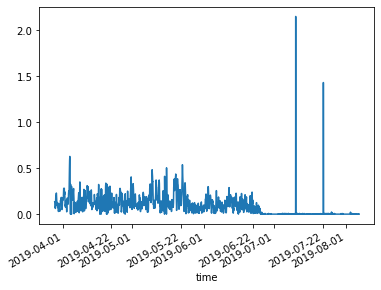

In [3]:
f = files[0]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

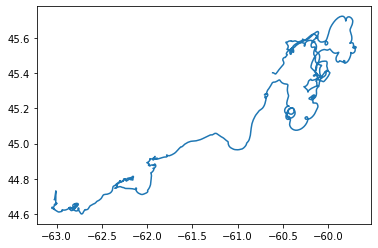

In [4]:
plt.plot(d.lon.values, d.lat.values)

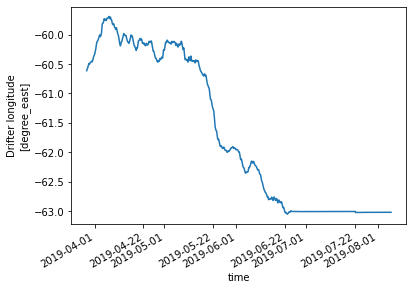

In [5]:
d.lon.plot()

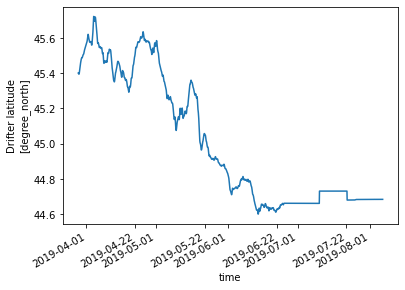

In [6]:
d.lat.plot()

Looks like this drifter was grounded after about June 22, 2019. I'll remove some of the data

In [7]:
inds = np.where(speed.values ==0)
inds

(array([ 163,  173,  466,  479,  536,  540,  727,  728, 1135, 1155, 1899,
        2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2136, 2138, 2140,
        2142, 2143, 2144, 2145, 2147, 2148, 2149, 2150, 2152, 2153, 2154,
        2155, 2156, 2157, 2158, 2159, 2160, 2162, 2163, 2164, 2165, 2166,
        2167, 2168, 2169, 2170, 2171, 2172, 2175, 2176, 2177, 2178, 2179,
        2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190,
        2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201,
        2202, 2203, 2204, 2206, 2207, 2211, 2212, 2213, 2214, 2215, 2216,
        2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227,
        2228, 2229, 2230, 2232, 2233, 2234, 2235, 2239, 2240, 2241, 2242,
        2243, 2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253,
        2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264,
        2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275,
        2276, 2277, 2278, 2279, 2280, 

In [8]:
d.time[inds].values

array(['2019-04-04T09:00:00.000000000', '2019-04-04T19:00:00.000000000',
       '2019-04-17T00:00:00.000000000', '2019-04-17T13:00:00.000000000',
       '2019-04-19T22:00:00.000000000', '2019-04-20T02:00:00.000000000',
       '2019-04-27T21:00:00.000000000', '2019-04-27T22:00:00.000000000',
       '2019-05-14T21:00:00.000000000', '2019-05-15T17:00:00.000000000',
       '2019-06-15T17:00:00.000000000', '2019-06-25T05:00:00.000000000',
       '2019-06-25T06:00:00.000000000', '2019-06-25T07:00:00.000000000',
       '2019-06-25T08:00:00.000000000', '2019-06-25T09:00:00.000000000',
       '2019-06-25T10:00:00.000000000', '2019-06-25T11:00:00.000000000',
       '2019-06-25T12:00:00.000000000', '2019-06-25T14:00:00.000000000',
       '2019-06-25T16:00:00.000000000', '2019-06-25T18:00:00.000000000',
       '2019-06-25T20:00:00.000000000', '2019-06-25T21:00:00.000000000',
       '2019-06-25T22:00:00.000000000', '2019-06-25T23:00:00.000000000',
       '2019-06-26T01:00:00.000000000', '2019-06-26

In [9]:
cut_off_time = d.time[inds[0][11]]
dnew = d.where(d.time.values<cut_off_time.values)
dnew = dnew.dropna(dim='time')

In [12]:
dnew.to_netcdf('{}~'.format(f))

# Drifter 2

correction-factor_svp300234066034380D20190328.nc


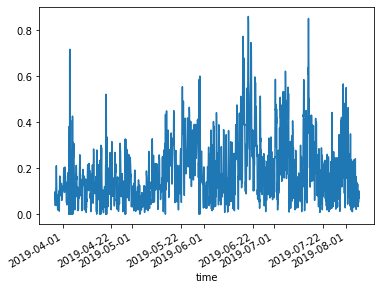

In [13]:
f = files[1]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

# Drifter 3

correction-factor_svp300234066035370D20190328.nc


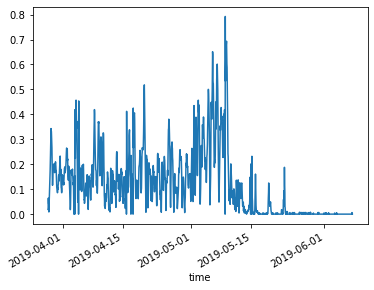

In [14]:
f = files[2]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

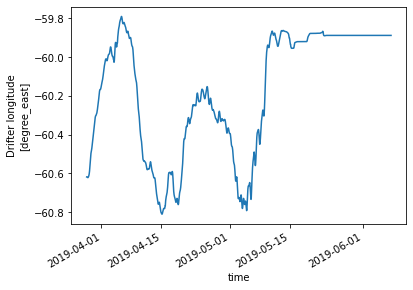

In [15]:
d.lon.plot()

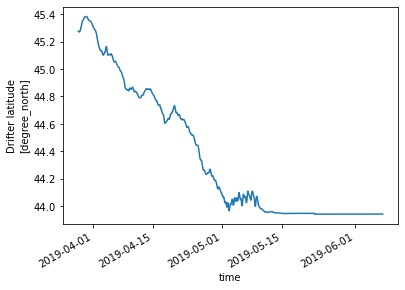

In [16]:
d.lat.plot()

Again, looks like this drifter is grounded or has reporting issues after May 15, 2019. I'm going to cut the data off after that.

In [17]:
cut_off_time =np.datetime64('2019-05-15')
dnew = d.where(d.time<cut_off_time)
dnew = dnew.dropna(dim='time')

In [18]:
dnew.to_netcdf('{}~'.format(f))

# Drifter 4

correction-factor_svp300234066037360D20190328.nc


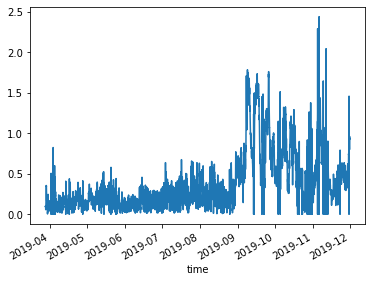

In [19]:
f = files[3]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

# Drifter 5

correction-factor_svp300234066084270D20191104.nc


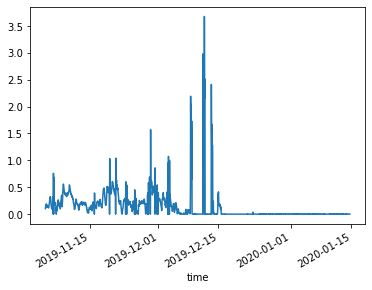

In [20]:
f = files[4]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

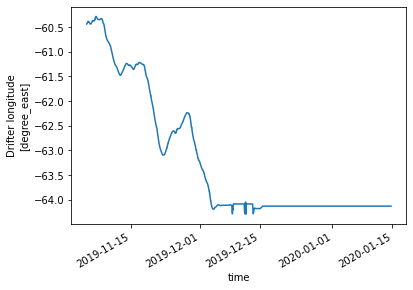

In [21]:
d.lon.plot()

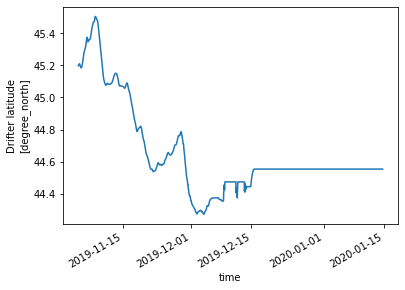

In [22]:
d.lat.plot()

This drifter is likely grounded or washing around in an intertidal zone after about Dec 7, 2019. I'll remove data after that

In [23]:
cut_off_time =np.datetime64('2019-12-07')
dnew = d.where(d.time<cut_off_time)
dnew = dnew.dropna(dim='time')

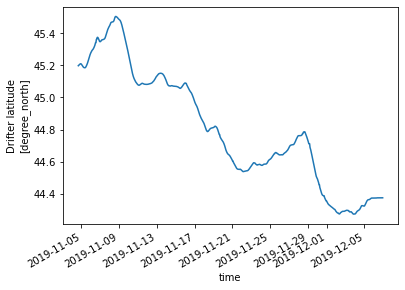

In [24]:
dnew.lat.plot()

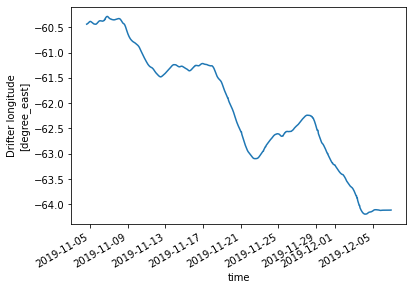

In [25]:
dnew.lon.plot()

In [26]:
dnew.to_netcdf('{}~'.format(f))

# Drifter 6

correction-factor_svp300234066088190D20191104.nc


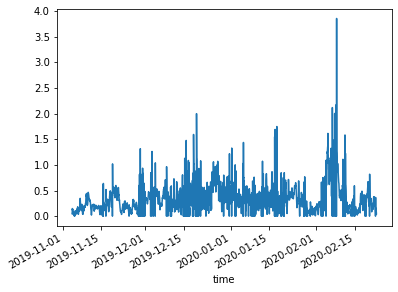

In [27]:
f = files[5]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

# Drifter 7

correction-factor_svp300234066089180D20191104.nc


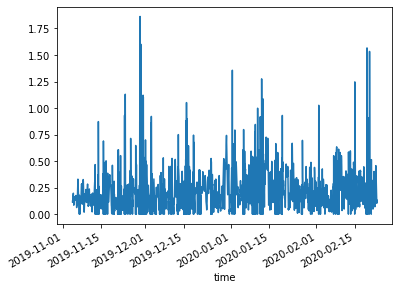

In [28]:
f = files[6]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()

# Drifter 8

correction-factor_svp300234066920980D20190328.nc


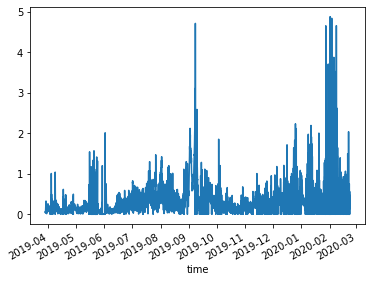

In [29]:
f = files[7]
print(os.path.basename(f))
d = xr.open_dataset(f)
speed = np.sqrt(d.ueast_drifter**2 + d.vnorth_drifter**2)
speed.plot()